# Chapter 10 - Working with Data

### Exploring your Data

#### Exploring One-Dimensional Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict
from collections import Counter
import math
from typing import Tuple, Callable

In [2]:
def bucketize(point: float, bucket_size: float) -> float:
    return bucket_size * math.floor(point / bucket_size)

In [3]:
def make_histogram(points: List[float], bucket_size: float) -> float:
    return Counter(bucketize(point, bucket_size) for point in points)

In [4]:
def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [5]:
import random

In [6]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
# plt.show()


plt.close()
plt.gca().clear()
plt.clf()

<Figure size 640x480 with 0 Axes>

In [7]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

In [8]:
random.seed(0)

In [9]:
uniform = [200 * random.random() - 100 for _ in range(10000)]

In [10]:
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

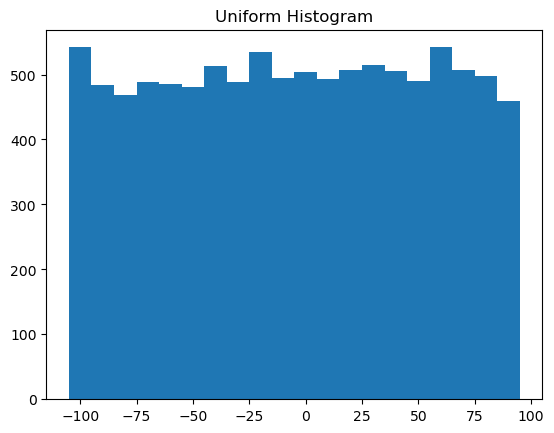

In [11]:
plot_histogram(uniform, 10, "Uniform Histogram")

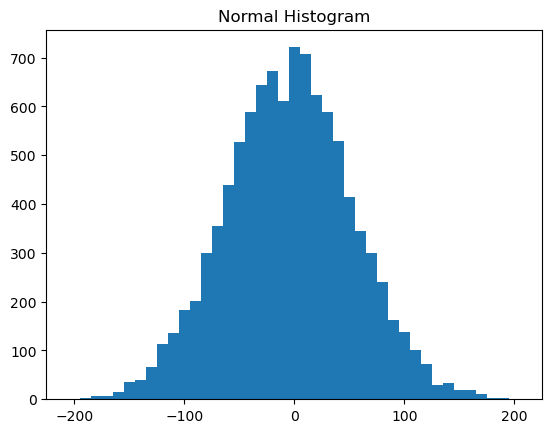

In [12]:
plot_histogram(normal, 10, "Normal Histogram")

#### Two Dimensions

In [13]:
def random_normal() -> float:
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

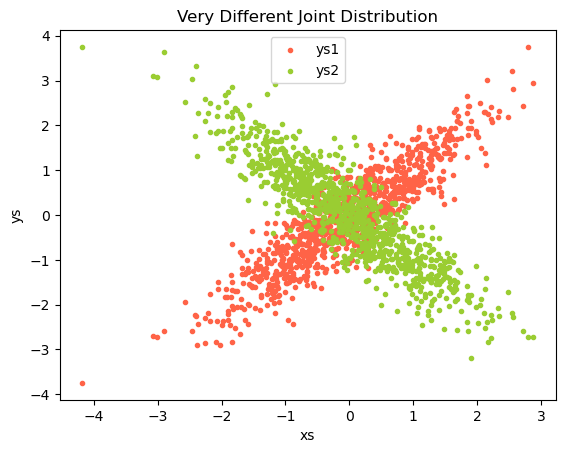

In [14]:
plt.scatter(xs, ys1, marker= '.', color='tomato', label='ys1')
plt.scatter(xs, ys2, marker= '.', color='yellowgreen', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distribution")
plt.show()

In [15]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,
               7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,
                 37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,
                 28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,
                 19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,
                 18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,
                 38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,
                 13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,
                 34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

In [16]:
###########
Vector = List[float]

###########
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

In [17]:
###########
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333


assert 7.3333 < mean(num_friends) < 7.3334

##########
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

###########
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [18]:
#########
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

In [19]:
#########
def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

In [20]:
#########
def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

In [21]:
##########
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

In [22]:
print(correlation(xs, ys1))

0.9010493686379609


In [23]:
print(correlation(xs, ys2))

-0.8920981526880033


In [24]:
##########
Vector = List[float]
##########
Matrix = List[List[float]]

A = [[1, 2, 3],  # A has 2 rows and 3 columns
     [4, 5, 6]]

B = [[1, 2],     # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

##########
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i

#### Many Dimensions

In [25]:
def correlation_matrix(data: List[Vector]) -> Matrix:
    
    def correlations_ij(i: int, j:int) -> float:
        return correlation(data[i], data[j])
    
    return make_matrix(len(data), len(data), correlation_ij)

In [26]:
corr_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
             10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
             20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
             30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
             40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
             50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
             60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
             70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
             80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
             91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]

In [27]:
num_vectors = len(corr_data)

In [28]:
# fig, ax = plt.subplots(num_vectors, num_vectors)

# for i in range(num_vectors):
#     for j in range(num_vectors):
        
#         if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])
            
#         else: ax[i][j].annotate("series" + str(i), (0.5, 0.5),
#                                 xycoords='axes fraction',
#                                 ha="center", va="center")
            
#         if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
#         if j > 0: ax[i][j].yaxis.set_visible(False)
            

# ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
# ax[0][0].set_ylim(ax[0][1].get_xlim())

# plt.show()

### Using Named Tuples

In [29]:
import datetime

In [30]:
stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'APPL'}

In [34]:
stock_price['closing_price'] = 103.06

In [35]:
price: Dict[datetime.date, float] = {}

In [31]:
from collections import namedtuple

In [37]:
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

In [32]:
from typing import NamedTuple

In [39]:
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
                
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'APPL']

In [40]:
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

### Dateclasses

In [33]:
from dataclasses import dataclass

In [42]:
@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float
        
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'APPL']
    
price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [43]:
# stock split
# price2.closing_price /= 2

# assert price2.closing_price == 51.03

In [44]:
price2.closing_price = 75

### Cleaning & Munging

In [45]:
# closing_price = float(row[2])

In [34]:
from dateutil.parser import parse

In [36]:
def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

In [48]:
sotck = parse_row(["MSFT", "2018-12-14", "106.03"])

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [49]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

In [50]:
# if not re.match(r"^[A-Z]+$", symbol):
#     return None

# try:
#     date = parse(date_).date()
# except ValueError:
#     return None

# try:
#     closing_price = float(closing_price_)
# except ValueError:
#     return None

# return StockPrice(symbol, date, closing_price)

In [51]:
# assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
# assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
# assert try_parse_row(["MSFT0", "2018-12-14", "x"]) is None

# assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) == stock

In [37]:
import csv

In [38]:
# with open("comma_delimeted_stock_prices.csv") as f:
#     reader = csv.reader(f)
#     for row in reader:
#         maybe_stock = try_parse_row(row)
#         if maybe_stock is None:
#             print(f"skipping invalid row: {row}")
#         else:
#             data.append(maybe_stock)

### Manipulating Data

In [39]:
# with open("comma_delimeted_stock_prices.csv") as f:
#     reader = csv.reader(f)

In [43]:
data = [
    StockPrice(symbol='MSFT',
               date=datetime.date(2018, 12, 24),
               closing_price = 106.03),
    #...
]

In [85]:
max_appl_price = max(stock.price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")

In [40]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

In [44]:
for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

In [45]:
from typing import List
from collections import defaultdict

In [90]:
prices: Dict[str, List[StockPrice]] = defaultdict(list)
    
for sp in data:
    prices[sp.symbol].append(sp)

In [59]:
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

In [60]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

In [61]:
class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

In [62]:
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

In [63]:
all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

### Rescaling

In [63]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))


def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

In [47]:
# On Inches
a_to_b = distance([63, 150], [67, 160])
a_to_c = distance([63, 150], [70, 171])
b_to_c = distance([67, 160], [70, 171])

In [48]:
# On centimeters
a_to_b = distance([160, 150], [170.2, 160])
a_to_c = distance([160, 150], [177.8, 171])
b_to_c = distance([170.2, 160], [177.8, 171])

In [49]:
from typing import Tuple

In [50]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

In [51]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [52]:
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    dim = len(data[0])
    
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i]for vector in data])
              for i in range(dim)]
    
    return means, stdevs

In [53]:
vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

In [54]:
def rescale(data: List[Vector]) -> List[Vector]:
    dim = len(data[0])
    menas, stdevs = scale(data)
    
    rescaled = [v[:] for v in data]
    
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i] / stdevs[i])
                
    return rescaled

In [56]:
means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

### An Aside: tqdm

In [57]:
import tqdm

In [58]:
for i in tqdm.tqdm(range(100)):
    _ = [random.random() for _ in range(1000000)]

100%|█████████████████████████████████████████| 100/100 [00:11<00:00,  8.61it/s]


In [59]:
tqdm.trange

<function tqdm.std.trange(*args, **kwargs)>

In [60]:
from typing import List

In [61]:
def primes_up_to(n: int) -> List[int]:
    primes = [2]
    
    with tqdm.trange(3, n) as t:
        for i in t:
            # i_is_prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
                
            t.set_description("f{len(primes)} primes")
        
    
    return primes
            

In [62]:
my_primes = primes_up_to(100_000)

f{len(primes)} primes: 100%|█████████████| 99997/99997 [05:02<00:00, 330.98it/s]


### Dimensionality Reduction

In [64]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

In [65]:
def de_mean(data: List[Vector]) -> List[Vector]:
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

In [66]:
def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

In [67]:
def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [68]:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [69]:
def directional_variance(data: List[Vector], w: Vector) -> float:
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

In [70]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

In [71]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [72]:
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    
    guess = [1.0 for _ in data[0]]
    
    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:3f}")
            
    return direction(guess)

In [73]:
def project(v: Vector, w: Vector) -> Vector:
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [74]:
def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    return subtract(v,project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

In [76]:
def pca(data: List[Vector], num_componets: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        components = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)
            
    return components

In [77]:
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

In [78]:
def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]